# Perceptron

## Menyiapkan Data yang Terpisahkan Linear

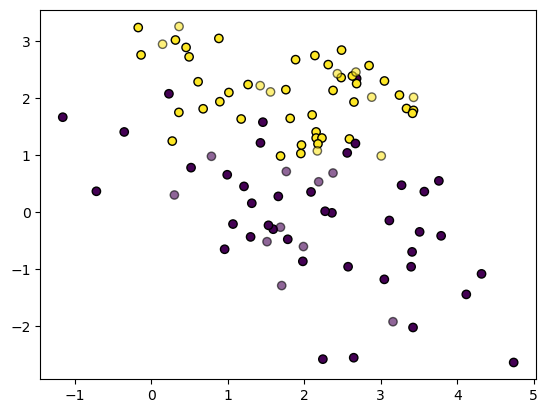

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

#dataset
X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=0, n_clusters_per_class=1
)
rng = np.random.RandomState(0)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.2)

#Plot training data
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train,  edgecolors="k")
#Plot testing data
plt.scatter(
    X_test[:, 0], X_test[:, 1], c=Y_test, alpha=0.6, edgecolors="k"
)
plt.show()
plt.close()

## Membuat Kelas dan Fungsi untuk Perceptron

In [2]:
#perceptron
class PerceptronClass:

    def __init__(self, learning_rate=0.01, num_iters=1000):
        self.weights = None
        self.bias = None
        self.num_iterations = num_iters
        self.lr = learning_rate

    def _unit_step_func(self, x):
        return np.where(x >= 0, 1, 0)

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        y_ = np.array([1 if i > 0 else 0 for i in y])
        for _ in range(self.num_iterations):
            for idx, x_i in enumerate(X):
                #Rumus Perceptron
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self._unit_step_func(linear_output)

                # Aturan untuk memperbaharui bobot:
                update = self.lr * (y_[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        #Rumus Perceptron
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self._unit_step_func(linear_output)
        return y_predicted

## Melatih Perceptron

In [3]:
#buat objek perceptron
perceptron = PerceptronClass()
#fit perceptron pada training data
perceptron.fit(X_train,Y_train)


## Plot Garis Keputusan dan Test Data

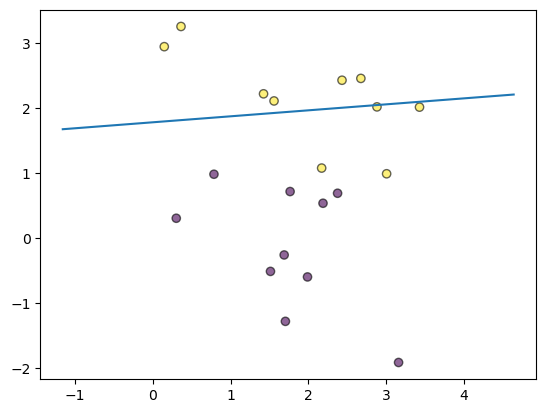

In [4]:
#Plot batas keputusan
c = -perceptron.bias / perceptron.weights[1]
m = -perceptron.weights[0] / perceptron.weights[1]
x = np.arange(X.T[0].min(), X.T[0].max(), 0.1)
plt.plot(x, m * x + c, label="batas keputusan")

#Plot testing data
plt.scatter(
    X_test[:, 0], X_test[:, 1], c=Y_test, alpha=0.6, edgecolors="k"
)
plt.show()
plt.close()

## Menghitung Akurasi

In [5]:
from sklearn.metrics import accuracy_score

#Prediksi data dengan perceptron
y_predicted = perceptron.predict(X_test)
y_predicted_train = perceptron.predict(X_train)

#Hitung akurasi prediksi
acc = accuracy_score(y_predicted,Y_test)
train_acc = accuracy_score(y_predicted_train,Y_train)

print("Training Accuracy: ", train_acc)
print("Testing Accuracy: ", acc)

Training Accuracy:  0.7375
Testing Accuracy:  0.8
